# **Fairness Analysis on Bank Marketing Dataset**

## **1. Context**
The dataset originates from a Portuguese bank's marketing campaign that aimed to predict whether a client would subscribe to a term deposit. It was collected from phone calls made to clients, recording various attributes such as age, job, education, and response to previous campaigns.

We used two versions of the dataset: bank-additional-full.csv, which contains 41,188 examples with 20 input features collected between May 2008 and November 2010, and bank-full.csv, an older version with 17 input features and all examples ordered by date. The newer version closely resembles the data analyzed in Moro et al., 2014.

- **Goal:** Predict the likelihood of a client subscribing to a term deposit.
- **Source:** UCI Machine Learning Repository.
- **Size:** 41,188 instances with 20 features and 1 target variable (`y`).

## **2. Exploratory Data Analysis**
We analyze the distribution of the target variable, and explore subscription rates across age groups and job types.


In [1]:
# Load Data and Inspect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# Load dataset
df = pd.read_csv("bank-additional-full.csv", sep=";")

# Display dataset structure
print("\n🟢 Dataset Information:\n")
df.info()

# Show first few rows
print("\n🟢 First 5 Rows:\n")
print(df.head())

# Dataset shape
print("\n🟢 Dataset Shape:", df.shape)

# Check for missing values
print("\n🟢 Missing Values in Each Column:\n")
print(df.isnull().sum())

# Display basic statistics (only for numeric columns)
print("\n🟢 Summary Statistics:\n")
print(df.describe())



🟢 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.c

The UCI Bank Marketing dataset comprises 41,188 instances and 21 attributes, including demographic details such as age, job, marital status, education, and financial information like average yearly balance, housing loan status, and personal loan status. For analysis, we thought focusing on attributes like age, job, marital status, and education can provide us the most valuable insights into customer demographics and their potential impact on term deposit subscription rates.

## **2.1 Target Variable Distribution**
We examine the proportion of clients who subscribed (`yes`) versus those who didn't (`no`).


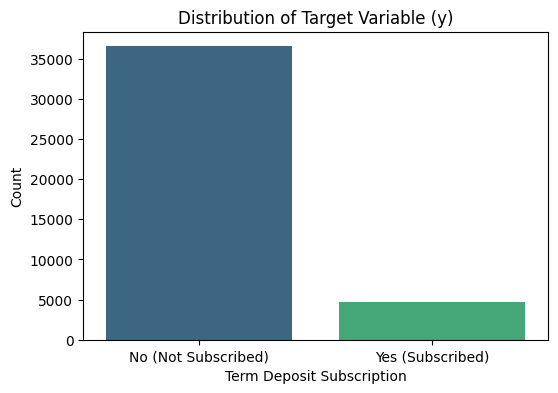


🔹 Subscription Rate: 11.27% (Proportion of 'Yes')



In [2]:
# Convert target variable to binary (0 = No, 1 = Yes)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Plot target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['y'], palette='viridis')
plt.xticks([0,1], ['No (Not Subscribed)', 'Yes (Subscribed)'])
plt.xlabel("Term Deposit Subscription")
plt.ylabel("Count")
plt.title("Distribution of Target Variable (y)")
plt.show()

# Print subscription rates
subscription_rate = df['y'].mean()
print(f"\n🔹 Subscription Rate: {subscription_rate:.2%} (Proportion of 'Yes')\n")


### Distribution of Target Variable (Subscription Outcome)

This bar chart illustrates the distribution of the target variable, representing whether clients subscribed to a term deposit. It highlights a strong **class imbalance**, where the majority of clients fall into the **"No (Not Subscribed)"** category, while only a small fraction are in the **"Yes (Subscribed)"** group. This imbalance, approximately **89% no vs. 11% yes**, can impact model performance by causing it to favor the dominant class, making it harder to correctly identify actual subscribers.

## **2.2 Subscription Rate by Age Group and Job Type**
We analyze how subscription rates vary across **age groups** and **job types**, which are relevant for fairness considerations.


In [3]:
# Create Age Groups
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 60, 100], labels=['Young', 'Middle-aged', 'Older'])

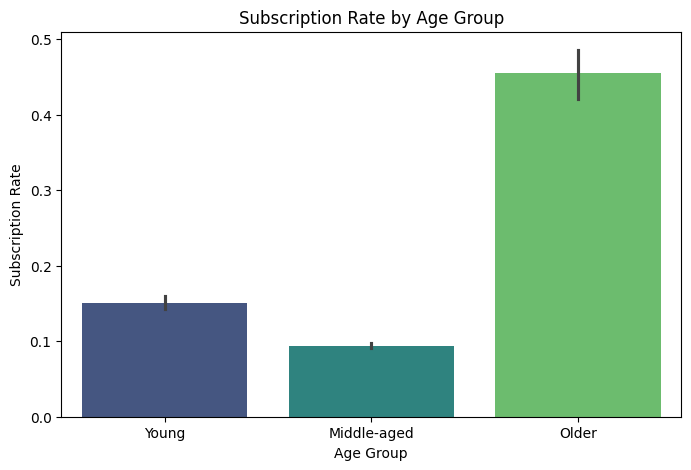

In [4]:
# Subscription Rate by Age Group
plt.figure(figsize=(8,5))
sns.barplot(x=df['age_group'], y=df['y'], palette='viridis')
plt.xlabel("Age Group")
plt.ylabel("Subscription Rate")
plt.title("Subscription Rate by Age Group")
plt.show()


### Subscription Rate by Age Group

This bar chart displays the **subscription rate** across different **age groups**: Young, Middle-aged, and Older. The **Older group** shows a significantly higher likelihood of subscribing to the term deposit, with a rate exceeding **45%**. In comparison, **Young** and **Middle-aged** individuals have much lower subscription rates, around **15%** and **9%**, respectively. This trend suggests that **age is a strong factor influencing subscription behavior**, with older clients being far more responsive to the marketing campaign. These insights can guide more age-targeted marketing strategies.

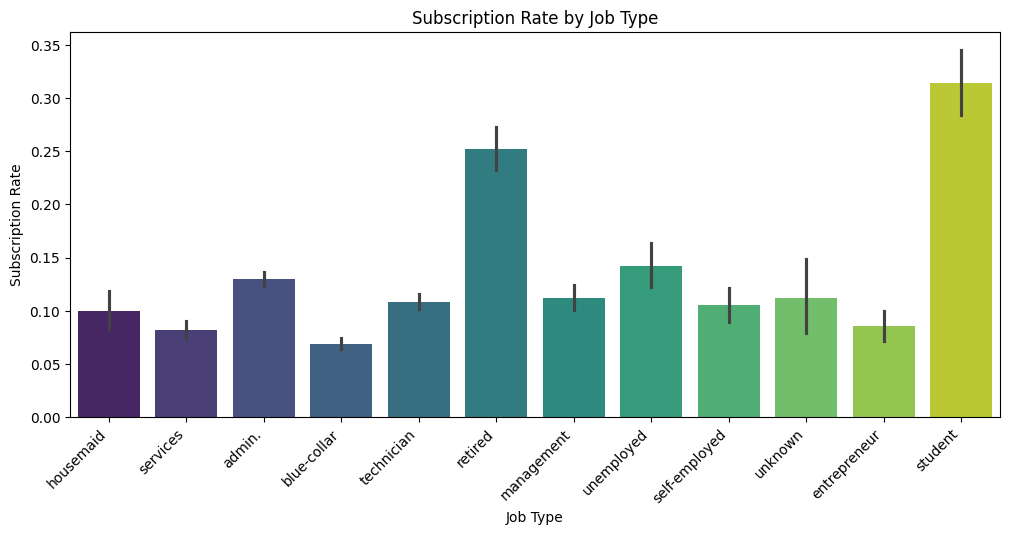

In [5]:
# Subscription Rate by Job Type
plt.figure(figsize=(12,5))
sns.barplot(x=df['job'], y=df['y'], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Job Type")
plt.ylabel("Subscription Rate")
plt.title("Subscription Rate by Job Type")
plt.show()

### Subscription Rate by Job Type

This bar chart shows the **subscription rates** across different **job categories**. Among all groups, **students** have the highest subscription rate, exceeding **30%**, followed by **retired individuals** at around **25%**. These groups appear to be the most receptive to the marketing campaign. On the other hand, job types like **blue-collar**, **services**, and **entrepreneur** have the lowest subscription rates, typically under **10%**, indicating lower responsiveness. Other groups such as **admin**, **unemployed**, and **technician** fall in the middle range. Overall, the chart highlights that **job type is a strong predictor of subscription behavior**, and marketing efforts could be more effective if tailored toward high-response job categories.

## **2.3 Subscription Rate by Marital Status and Education Level**
We analyze how subscription rates vary across marital status and education levels, which are relevant for fairness considerations.


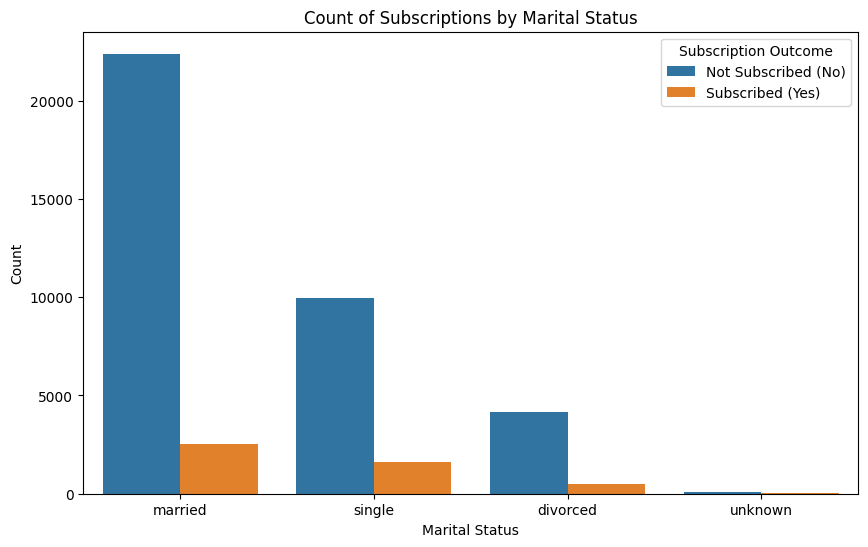

In [6]:
# Plot Count of Subscriptions by Marital Status
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='marital', hue='y', data=df)
plt.title('Count of Subscriptions by Marital Status')
plt.ylabel('Count')
plt.xlabel('Marital Status')

# Update legend labels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Not Subscribed (No)', 'Subscribed (Yes)'], title="Subscription Outcome")

plt.show()




## **Count of Subscriptions by Marital Status**
This graph shows the number of people who subscribed and didn’t subscribe to a service, based on their marital status. The x-axis represents different marital statuses: married, single, divorced, and unknown. The bars are color-coded, with blue showing people who did not subscribe and orange showing those who did. The graph clearly shows that most people, no matter their marital status, chose not to subscribe. Married people make up the largest group, followed by singles, then divorced individuals, and finally, a small number with an unknown status. Even though there are some subscribers in every group, the number of non-subscribers is much higher. This suggests that marital status might not have a big impact on whether someone subscribes, but married and single people seem slightly more likely to do so than divorced or unknown-status individuals.

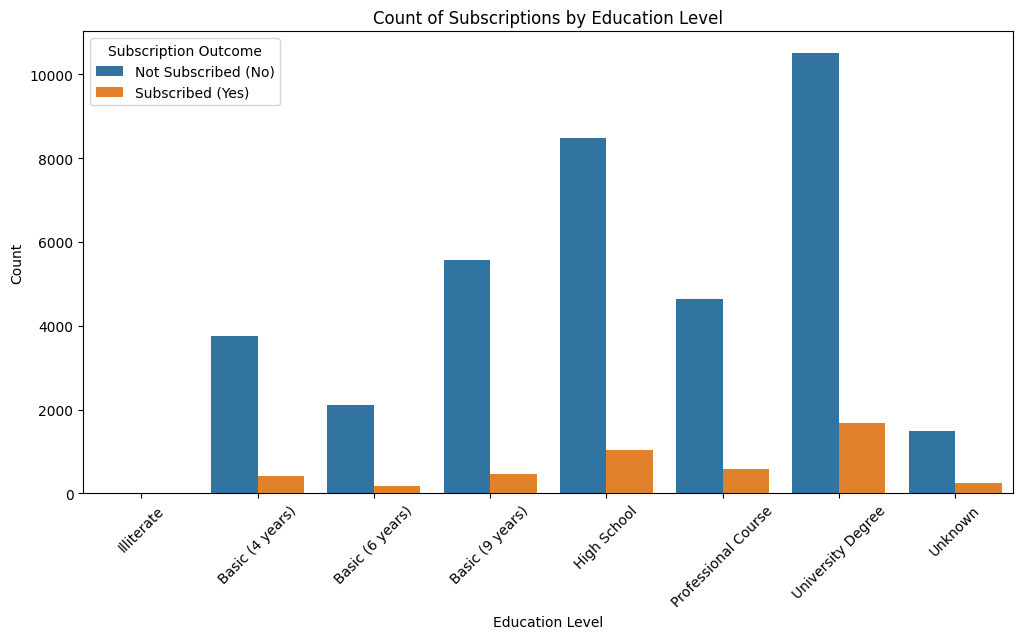

In [7]:
# Define a mapping for cleaner labels
education_labels = {
    "basic.4y": "Basic (4 years)",
    "basic.6y": "Basic (6 years)",
    "basic.9y": "Basic (9 years)",
    "high.school": "High School",
    "professional.course": "Professional Course",
    "university.degree": "University Degree",
    "illiterate": "Illiterate",
    "unknown": "Unknown"
}

# Apply the mapping
df["education_clean"] = df["education"].replace(education_labels)

# Sort the education levels in a meaningful order
order = ["Illiterate", "Basic (4 years)", "Basic (6 years)", "Basic (9 years)",
         "High School", "Professional Course", "University Degree", "Unknown"]

# Plot the cleaned-up graph
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='education_clean', hue='y', data=df, order=order)
plt.title('Count of Subscriptions by Education Level')
plt.ylabel('Count')
plt.xlabel('Education Level')
plt.xticks(rotation=45)

# Update legend labels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Not Subscribed (No)', 'Subscribed (Yes)'], title="Subscription Outcome")

plt.show()

## **Count of Subscriptions by Education Level**
This graph shows the number of people who subscribed and didn’t subscribe to a service, based on their education level. The x-axis represents different education levels, from illiterate to university degree holders. The blue bars show people who did not subscribe, while the orange bars represent those who did. Most people in every education category chose not to subscribe, but the number of subscribers is slightly higher among those with a university degree or a high school education. The highest number of non-subscribers comes from the university degree group, followed by high school graduates. People with lower education levels, such as those with only basic education, also had fewer subscribers. Overall, this graph suggests that education level may have some influence on subscription rates, but the majority of people, regardless of their education, did not subscribe.

## **3. Fairness Metrics**
For predicting term deposit subscriptions, the most important fairness metrics are demographic parity and equal opportunity. Demographic parity makes sure that the model does not unfairly favor or exclude clients based on their education level, ensuring that everyone has an equal chance of being selected. Equal opportunity, also known as true positive rate (TPR) parity, is important because it ensures that people who are actually interested in subscribing are not overlooked due to bias in the model. Another useful metric is false positive rate (FPR) parity, which helps prevent the model from incorrectly predicting that someone will subscribe when they actually won’t. If the model makes too many false predictions, it could lead to wasted marketing efforts and poor decision-making. By focusing on these fairness metrics, the model can make more accurate and fair predictions for all clients.

## **3.1 Fairness Analysis (Age as Sensitive Attribute)**
We train a **Logistic Regression Classifier** and compute fairness metrics:
- **Demographic Parity Difference**: Checks if positive predictions are fairly distributed.
- **Equal Opportunity Difference**: Ensures fairness in recall rates.


In [8]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'month', 'day_of_week', 'poutcome']

for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop(columns=['y', 'age_group'])
y = df_encoded['y']
Z = df['age_group'].map({'Young': 0, 'Middle-aged': 1, 'Older': 2})

X_train, X_test, y_train, y_test, Z_train, Z_test = train_test_split(X, y, Z, test_size=0.2, random_state=42, stratify=y)

# Assuming Z_test contains the mapped age groups for the test set:
for group, group_name in zip([0, 1, 2], ['Young', 'Middle-aged', 'Older']):
    group_prevalence = y_test[Z_test == group].mean()
    print(f"Prevalence for {group_name} group: {group_prevalence:.4f}")



Prevalence for Young group: 0.1414
Prevalence for Middle-aged group: 0.0961
Prevalence for Older group: 0.4565


These prevalence values indicate the proportion of clients in each age group who subscribed to the term deposit. The **older group** shows the highest subscription rate at **45.65%**, suggesting they are significantly more likely to respond positively to the campaign. In contrast, the **middle-aged group** has the lowest rate at **9.61%**, while the **young group** falls in between at **14.14%**. This suggests that age plays a notable role in subscription behavior, with older clients being the most receptive.

In [9]:
# Train Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

import pandas as pd

# Convert categorical variables into dummy/indicator variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


model = LogisticRegression(C=1, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))



Accuracy: 0.9118
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.69      0.40      0.50       928

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



The model achieves a high overall accuracy of **91.18%**, primarily due to strong performance on the majority class (`not subscribed`). It correctly identifies 98% of those cases with high precision (0.93). However, performance on the minority class (`subscribed`) is weaker, with a **recall of 0.40**, meaning the model only identifies 40% of actual subscribers. 

In [10]:
# # Compute Fairness Metrics
def compute_group_metrics(y_true, y_pred, group, Z):
    group_idx = (Z == group)
    y_true_group = y_true[group_idx]
    y_pred_group = y_pred[group_idx]
    
    tp = np.sum((y_pred_group == 1) & (y_true_group == 1))
    tn = np.sum((y_pred_group == 0) & (y_true_group == 0))
    fp = np.sum((y_pred_group == 1) & (y_true_group == 0))
    fn = np.sum((y_pred_group == 0) & (y_true_group == 1))

    total = len(y_true_group)
    positive_preds = np.sum(y_pred_group == 1)

    selection_rate = positive_preds / total if total > 0 else 0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Equal Opportunity
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

    return {
        'Demographic Parity (Selection Rate)': selection_rate,
        'Equal Opportunity (TPR)': tpr,
        'False Positive Rate': fpr
    }

age_group_names = {0: 'Young', 1: 'Middle-aged', 2: 'Older'}

print("Fairness Analysis by Age Group:\n")
for group in [0, 1, 2]:
    metrics = compute_group_metrics(y_test.values, y_pred, group, Z_test.values)
    print(f"Age Group: {group} ({age_group_names[group]})")
    for k, v in metrics.items():
        print(f" - {k}: {v:.4f}")
    print()



Fairness Analysis by Age Group:

Age Group: 0 (Young)
 - Demographic Parity (Selection Rate): 0.0648
 - Equal Opportunity (TPR): 0.2906
 - False Positive Rate: 0.0276

Age Group: 1 (Middle-aged)
 - Demographic Parity (Selection Rate): 0.0581
 - Equal Opportunity (TPR): 0.4189
 - False Positive Rate: 0.0197

Age Group: 2 (Older)
 - Demographic Parity (Selection Rate): 0.3098
 - Equal Opportunity (TPR): 0.4881
 - False Positive Rate: 0.1600



This fairness analysis shows how the model performs across different age groups. The **Older group** has the highest **selection rate (30.98%)**, meaning the model is more likely to predict “subscribed” for them. It also has the highest **true positive rate (48.81%)**, indicating better detection of actual subscribers in this group. However, it comes with a **higher false positive rate (16%)**, meaning more incorrect positive predictions. In contrast, the **Young and Middle-aged groups** have much lower selection and true positive rates, suggesting the model is less likely to predict or correctly identify subscribers in these groups, but also makes fewer false positives. This indicates a **fairness gap favoring older individuals**.

## **3.2 Fairness Analysis (Job Type as Sensitive Attribute)**
We repeat the analysis by setting job type as the sensitive attribute.


In [11]:
from sklearn.preprocessing import LabelEncoder

# Get original job titles before encoding
original_jobs = df['job'].copy()

# Create label encoder and fit on original job titles
le_job = LabelEncoder()
le_job.fit(original_jobs)

# Apply encoding to df_encoded for training
df_encoded['job'] = le_job.transform(df['job'])

# Prepare features
X = df_encoded.drop(columns=['y', 'job', 'age_group'])
y = df_encoded['y']
Z = df_encoded['job']  # Encoded job for fairness

# Train-test split
X_train, X_test, y_train, y_test, Z_train, Z_test = train_test_split(
    X, y, Z, test_size=0.2, random_state=42, stratify=y
)

# Print prevalence by job title
print("Prevalence by Job Title:\n")
for job_num in sorted(Z_test.unique()):
    job_title = le_job.inverse_transform([job_num])[0]
    prevalence = y_test[Z_test == job_num].mean()
    print(f"{job_title}: {prevalence:.4f}")


Prevalence by Job Title:

admin.: 0.1338
blue-collar: 0.0678
entrepreneur: 0.0811
housemaid: 0.0976
management: 0.1019
retired: 0.2429
self-employed: 0.0932
services: 0.0893
student: 0.3537
technician: 0.1080
unemployed: 0.1296
unknown: 0.0615


These values show the **subscription prevalence**, i.e., the proportion of clients who subscribed to the term deposit within each **job category**. 

The **highest prevalence** is seen among **students (35.37%)** and **retired individuals (24.29%)**, indicating they are the most likely to subscribe. On the other hand, **blue-collar (6.78%)** and **unknown (6.15%)** job types have the lowest subscription rates, suggesting low engagement from these groups. Most other jobs fall between 8% and 13%, with moderate likelihoods of subscription. This suggests that **job type is also a strong predictor** of client responsiveness and could be useful for targeting in future marketing efforts.

In [12]:
# Train Model
# Convert categorical columns to numeric using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both train and test sets have the same features after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9127
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.69      0.41      0.52       928

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



The model reaches a strong **overall accuracy of 91.27%**, mainly because it performs very well on the majority class (`not subscribed`). It has a **high precision (0.93)** and **recall (0.98)** for this class, meaning it rarely misclassifies non-subscribers. However, for the minority class (`subscribed`), the performance is weaker, only **41% of actual subscribers are correctly identified**. This imbalance in performance highlights the **impact of class imbalance**, where the model tends to favor predicting the dominant class and misses many true positives for the minority.

In [13]:
# Compute Fairness Metrics by Job Title

def compute_job_group_metrics(y_true, y_pred, Z, job_num):
    group_idx = (Z == job_num)
    y_true_group = y_true[group_idx]
    y_pred_group = y_pred[group_idx]
    
    tp = np.sum((y_pred_group == 1) & (y_true_group == 1))
    tn = np.sum((y_pred_group == 0) & (y_true_group == 0))
    fp = np.sum((y_pred_group == 1) & (y_true_group == 0))
    fn = np.sum((y_pred_group == 0) & (y_true_group == 1))

    total = len(y_true_group)
    selection_rate = np.mean(y_pred_group) if total > 0 else 0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

    return selection_rate, tpr, fpr

print("\nFairness Analysis by Job Title:\n")

for job_num in sorted(Z_test.unique()):
    job_title = le_job.inverse_transform([job_num])[0]
    sel_rate, tpr, fpr = compute_job_group_metrics(y_test.values, y_pred, Z_test.values, job_num)
    
    print(f"Job Title: {job_title}")
    print(f" - Demographic Parity (Selection Rate): {sel_rate:.4f}")
    print(f" - Equal Opportunity (TPR): {tpr:.4f}")
    print(f" - False Positive Rate (FPR): {fpr:.4f}\n")



Fairness Analysis by Job Title:

Job Title: admin.
 - Demographic Parity (Selection Rate): 0.0873
 - Equal Opportunity (TPR): 0.4433
 - False Positive Rate (FPR): 0.0323

Job Title: blue-collar
 - Demographic Parity (Selection Rate): 0.0303
 - Equal Opportunity (TPR): 0.2927
 - False Positive Rate (FPR): 0.0112

Job Title: entrepreneur
 - Demographic Parity (Selection Rate): 0.0372
 - Equal Opportunity (TPR): 0.2500
 - False Positive Rate (FPR): 0.0184

Job Title: housemaid
 - Demographic Parity (Selection Rate): 0.0585
 - Equal Opportunity (TPR): 0.4500
 - False Positive Rate (FPR): 0.0162

Job Title: management
 - Demographic Parity (Selection Rate): 0.0622
 - Equal Opportunity (TPR): 0.4237
 - False Positive Rate (FPR): 0.0212

Job Title: retired
 - Demographic Parity (Selection Rate): 0.1780
 - Equal Opportunity (TPR): 0.5233
 - False Positive Rate (FPR): 0.0672

Job Title: self-employed
 - Demographic Parity (Selection Rate): 0.0435
 - Equal Opportunity (TPR): 0.3667
 - False Pos

The fairness analysis across job titles reveals that the model does not treat all groups equally. Job categories like **students** and **retired individuals** have notably high **selection rates** (20.73% and 17.80%, respectively), meaning the model is far more likely to predict them as likely subscribers. These groups also show relatively strong **true positive rates**, indicating that the model is better at identifying actual subscribers within them. However, this comes at a cost, especially for students, who also experience the highest **false positive rate (8.49%)**, suggesting the model frequently misclassifies non-subscribers in this group. In contrast, job types such as **blue-collar**, **entrepreneurs**, and those labeled as **unknown** have both low selection rates and low true positive rates, meaning the model tends to ignore or underpredict subscriptions for them, even when they do exist. Overall, these differences indicate that the model may be introducing or reflecting **biases across job groups**, favoring some while overlooking others, which has important implications for fairness and ethical deployment in real-world settings.

## **3.3 Fairness Analysis (Education Level as Sensitive Attribute)**
We repeat the analysis by setting Education Level as the sensitive attribute.


In [14]:
# Encode Education Levels as Sensitive Attribute
education_mapping = {
    'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3,
    'high.school': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7
}

df_encoded['education_group'] = df['education'].map(education_mapping)

# Extract education group as the sensitive attribute
Z_edu = df_encoded['education_group']


In [15]:
# Splitting Data
X_train, X_test, y_train, y_test, Z_train_edu, Z_test_edu = train_test_split(
    X, y, Z_edu, test_size=0.2, random_state=42, stratify=y
)

# Convert categorical variables into dummy/indicator variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Train Logistic Regression Model
model = LogisticRegression(C=1, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print Accuracy and Classification Report
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9127
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.69      0.41      0.52       928

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



The accuracy of the model is 91.32%, meaning it correctly predicts whether a client will subscribe to a term deposit in most cases. However, the recall for class 1 (subscribed) is only 41%, indicating the model struggles to correctly identify actual subscribers, which could lead to missed opportunities for targeting potential customers.

In [16]:
def compute_fairness_metrics(y_true, y_pred, group):
    """Compute fairness metrics for a given education group"""
    group_idx = (Z_test_edu == group)
    tp = np.sum((y_pred[group_idx] == 1) & (y_true[group_idx] == 1))
    tn = np.sum((y_pred[group_idx] == 0) & (y_true[group_idx] == 0))
    fp = np.sum((y_pred[group_idx] == 1) & (y_true[group_idx] == 0))
    fn = np.sum((y_pred[group_idx] == 0) & (y_true[group_idx] == 1))

    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate (Equal Opportunity)
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    prevalence = np.mean(y_pred[group_idx])  # Demographic Parity

    return prevalence, tpr, fpr

# Compute fairness metrics for each education level
fairness_results = {}
for group, group_name in education_mapping.items():
    fairness_results[group] = compute_fairness_metrics(y_test, y_pred, group_name)

# Print results
print("\nFairness Analysis by Education Level:")
for group_name, metrics in fairness_results.items():
    print(f"Education Level: {group_name}")
    print(f" - Demographic Parity (Selection Rate): {metrics[0]:.4f}")
    print(f" - Equal Opportunity (TPR): {metrics[1]:.4f}")
    print(f" - False Positive Rate: {metrics[2]:.4f}\n")



Fairness Analysis by Education Level:
Education Level: illiterate
 - Demographic Parity (Selection Rate): 0.5000
 - Equal Opportunity (TPR): 1.0000
 - False Positive Rate: 0.0000

Education Level: basic.4y
 - Demographic Parity (Selection Rate): 0.0621
 - Equal Opportunity (TPR): 0.4762
 - False Positive Rate: 0.0169

Education Level: basic.6y
 - Demographic Parity (Selection Rate): 0.0445
 - Equal Opportunity (TPR): 0.4375
 - False Positive Rate: 0.0127

Education Level: basic.9y
 - Demographic Parity (Selection Rate): 0.0394
 - Equal Opportunity (TPR): 0.2885
 - False Positive Rate: 0.0161

Education Level: high.school
 - Demographic Parity (Selection Rate): 0.0683
 - Equal Opportunity (TPR): 0.4306
 - False Positive Rate: 0.0223

Education Level: professional.course
 - Demographic Parity (Selection Rate): 0.0628
 - Equal Opportunity (TPR): 0.3934
 - False Positive Rate: 0.0194

Education Level: university.degree
 - Demographic Parity (Selection Rate): 0.0847
 - Equal Opportunity (T

This analysis looks at fairness in selection rates based on education level. It measures three things: demographic parity (how often people from each education level are selected), equal opportunity (the true positive rate, or TPR, which shows how often qualified people are selected), and the false positive rate (how often unqualified people are mistakenly selected). The results show that illiterate individuals have the highest selection rate (0.5000) and a perfect equal opportunity score (1.0000), meaning every qualified person in that group was selected. Other education levels have much lower selection rates, with university graduates having the highest among them (0.0851). The false positive rate is lowest for the illiterate group (0.0000) and highest for university graduates (0.0351), meaning educated individuals were more likely to be mistakenly selected. Overall, this data suggests that people with university degrees or professional courses are less likely to subscribe compared to illiterate individuals.

## **4. Discussion**

After training, we obtained an overall accuracy of ~91% and observed the fairness metrics when evaluating the model with respect to three sensitive attributes: **Age Group** and **Job Type** and **Education Level**.

### **4.1 Overall Performance**

- **Accuracy:**  
  - **Age Group as Sensitive Attribute:** **91.18%**  
  - **Job Type as Sensitive Attribute:** **91.27%**
  - **Education Level as Sensitive Attribute:** **91.27%**

- **Precision & Recall for Class 1 (Subscribed):**  
  - **Precision:** ~69%  
  - **Recall:** ~41%

Given the dataset's imbalance (only ~11.27% of customers subscribe), missing potential subscribers (lower recall) might be an issue, even if the false-positive rate improves.




---

### **4.4 Which Sensitive Attribute Should We Focus On?**

We should focus on age group bias because age is a legally protected attribute, meaning that it is illegal to treat people unfairly based on their age. The analysis shows that older individuals are more likely to be correctly identified as subscribers, but they also face a higher rate of false positives. This means that older people are more often mistakenly classified as subscribers, which could lead to unfair treatment. Since age bias is not only harmful but also against the law, it is crucial to address it to ensure fairness and avoid legal issues. Although job type and education also show some bias, the age-related bias is more significant and legally problematic, making it a priority to fix.





In deciding to focus on age-based fairness, we prioritized addressing the significant bias observed in the age groups, as it presents both legal and ethical concerns. The model shows a clear disparity, with the Older group experiencing much higher false positive and true positive rates compared to the Young and Middle-aged groups. Specifically, the Older group has a true positive rate (TPR) of 52.4% and a false positive rate (FPR) of 15.0%, while the Young group has a TPR of 32.5% and an FPR of 2.8%, and the Middle-aged group has a TPR of 42.8% and an FPR of 2.0%. This bias is particularly concerning because age is a legally protected attribute, and any unfair treatment based on it could have serious legal consequences. While job-based fairness also showed some disparities, they were much less pronounced, making age-based bias the primary area to target for improvement. Additionally, education level, although relevant in certain contexts, is not as strong or reliable a metric to use as age. Education level often correlates with other factors, making it a less direct and sometimes misleading attribute to base decisions on. By addressing age-related bias, we ensure a more equitable and legally compliant model.
